Name Of The Student: Jayaram K

Internship Project Topic: TCS iON RIO-125: Project Demand of Products at a Retail Outlet Based on Historical Data

Name of the Organization: TCS iON

Name of the Industry Mentor: Debashis Roy

Name of the Institute: ICT Academy of Kerala

In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# reading the csv files
train = pd.read_csv(r'E:\ICT\Intership\Dataset\demand-forecasting\train.csv')
test = pd.read_csv(r'E:\ICT\Intership\Dataset\demand-forecasting\test.csv')

### Data Understanding

In [5]:
#getting the concise summary of the dataset
print('Train dataset information:-')
train.info()
print('\nTest dataset information:-')
test.info()

Train dataset information:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB

Test dataset information:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


- We see that there are 4 columns in each dataset, however, the date column is in object datatype. We need to have it as date objects.

In [6]:
# reloading the datasets using parse_dates parameter
df_train = pd.read_csv(r'E:\ICT\Intership\Dataset\demand-forecasting\train.csv', parse_dates=['date'])
df_test = pd.read_csv(r'E:\ICT\Intership\Dataset\demand-forecasting\test.csv', parse_dates=['date'])

In [6]:
#getting the concise summary of the dataset
print('Train dataset information:-')
df_train.info()
print('\nTest dataset information:-')
df_test.info()

Train dataset information:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB

Test dataset information:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      45000 non-null  int64         
 1   date    45000 non-null  datetime64[ns]
 2   store   45000 non-null  int64         
 3   item    45000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.4 MB


- Now we can see that date column is in datetime64 datatype

**Feature description**
- date: Date of the sale data. There are no holiday effects or store closures. 
- store: Store ID
- item:Item ID
- sales:Number of items sold at a particular store on a particular date.

In [7]:
# checking the shape of the dataset
print('The shape of train dataset:',df_train.shape[0],'rows and',df_train.shape[1],'columns.' )
print('The shape of test dataset:',df_test.shape[0],'rows and',df_test.shape[1],'columns.')

The shape of train dataset: 913000 rows and 4 columns.
The shape of test dataset: 45000 rows and 4 columns.


In [8]:
# checking the start and end date in the date columns
print('Train data:-')
print(' The starting date in the train dataset:',df_train['date'].min().date())
print(' The ending date in the train dataset:',df_train['date'].max().date())
print('\nTest data:-')
print(' The starting date in the test dataset:',df_test['date'].min().date())
print(' The ending date in the test dataset:',df_test['date'].max().date())

Train data:-
 The starting date in the train dataset: 2013-01-01
 The ending date in the train dataset: 2017-12-31

Test data:-
 The starting date in the test dataset: 2018-01-01
 The ending date in the test dataset: 2018-03-31


In [9]:
# Checking the column names in the datasets
print('Columns in the datasets:-')
print('Columns in the Train dataset:\n',  df_train.columns.values)
print('Columns in the Test dataset:\n', df_test.columns.values)

Columns in the datasets:-
Columns in the Train dataset:
 ['date' 'store' 'item' 'sales']
Columns in the Test dataset:
 ['id' 'date' 'store' 'item']


- We can see that the target variable 'sales' only present in the train dataset, hence, we will use the train dataset for the data understanding. and there is a 'id' column in test dataset which is not relevant for our project. 

##### Null Values

In [10]:
# checking for missing values
print('Checking for Null values in train dataset:')
print(df_train.isnull().sum())
print('\nChecking for Null values in test dataset:')
print(df_test.isnull().sum())

Checking for Null values in train dataset:
date     0
store    0
item     0
sales    0
dtype: int64

Checking for Null values in test dataset:
id       0
date     0
store    0
item     0
dtype: int64


- As we can see, there is no null values present in our datasets.

##### Outlier detection

In [11]:
# getting the statistical summary of sales column 
df_train['sales'].describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

Inter Quartile Range:

We will use IQR(Inter Quartile Range) method with Q1 as 5 and Q3 as 95 for outlier detection. First we compute the low limit and up limit with IQR method and check if the sales variable contain values above/below these limits. 

In [12]:
# detecting outliers using Inter Quartile Range
Q1 = np.percentile(df_train['sales'], 5, interpolation = 'midpoint')
Q3 = np.percentile(df_train['sales'], 95, interpolation = 'midpoint')

IQR = Q3 - Q1

low_limit = Q1 - 1.5 * IQR
upp_limit = Q3 + 1.5 * IQR

outlier = []
for i in df_train['sales']:
    if ((i < low_limit) or ( i > upp_limit )):
        outlier.append(i)

print("The no.of outliers present in the 'sales' column:",len(outlier))

The no.of outliers present in the 'sales' column: 0


- As we can see, there is outlieres present in the 'sales' column.

In [13]:
# Displaying the distinct elements present in the 'store' column
print('No.of stores:',df_train['store'].nunique())
print("Store ID's:", df_train['store'].unique())

No.of stores: 10
Store ID's: [ 1  2  3  4  5  6  7  8  9 10]


In [14]:
# Displaying the distinct elements present in the 'store' column
print('No.of items:',df_train['item'].nunique())
print("Item ID's:", df_train['item'].unique())

No.of items: 50
Item ID's: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [15]:
# Checking whether there are same no.of items in each stores
df_train.groupby('store').agg({'item':'nunique'})

item
store      
1        50
2        50
3        50
4        50
5        50
6        50
7        50
8        50
9        50
10       50

- We can see that all the 10 stores got same no.of items, 50 each.

In [16]:
# Checking whether there are same no.of of sales in each store
df_train.groupby(['store','item']).agg({'sales':'sum'})

sales
store item        
1     1      36468
      2      97050
      3      60638
      4      36440
      5      30335
...            ...
10    46    120601
      47     45204
      48    105570
      49     60317
      50    135192

[500 rows x 1 columns]

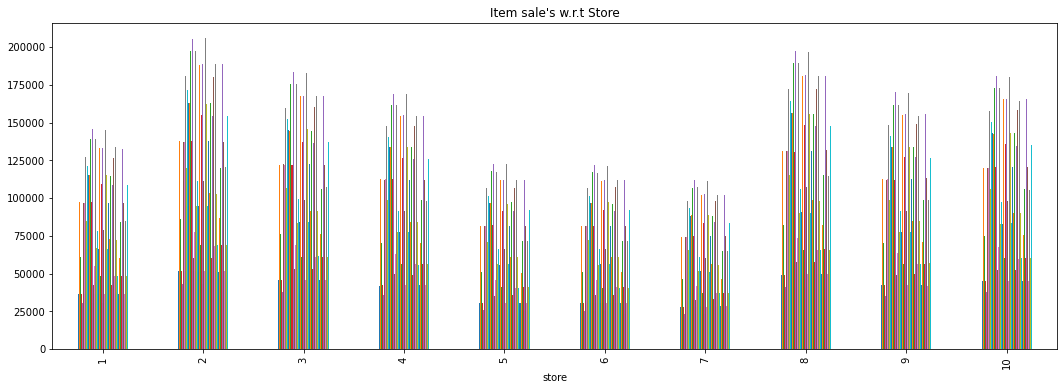

In [17]:
# Plotting a graph for better understanding
gb_sale_item = df_train.groupby(['store','item']).agg({'sales':'sum'})
gb_sale_item = gb_sale_item.pivot_table(index="store", columns="item", values=["sales"])
gb_sale_item.plot.bar(figsize=(18,6), legend = False)
plt.title("Item sale's w.r.t Store")
plt.show()

- We can see that no.of of sales of each items in store are differnt.

We will now check how to give a basic prediction of sales. 

In [18]:
# a basic prediction by taking the average values of sales for each items on each store.
df_train.groupby(['store','item']).agg({'sales':'mean'})

sales
store item           
1     1     19.971522
      2     53.148959
      3     33.208105
      4     19.956188
      5     16.612815
...               ...
10    46    66.046550
      47    24.755750
      48    57.814896
      49    33.032311
      50    74.037240

[500 rows x 1 columns]

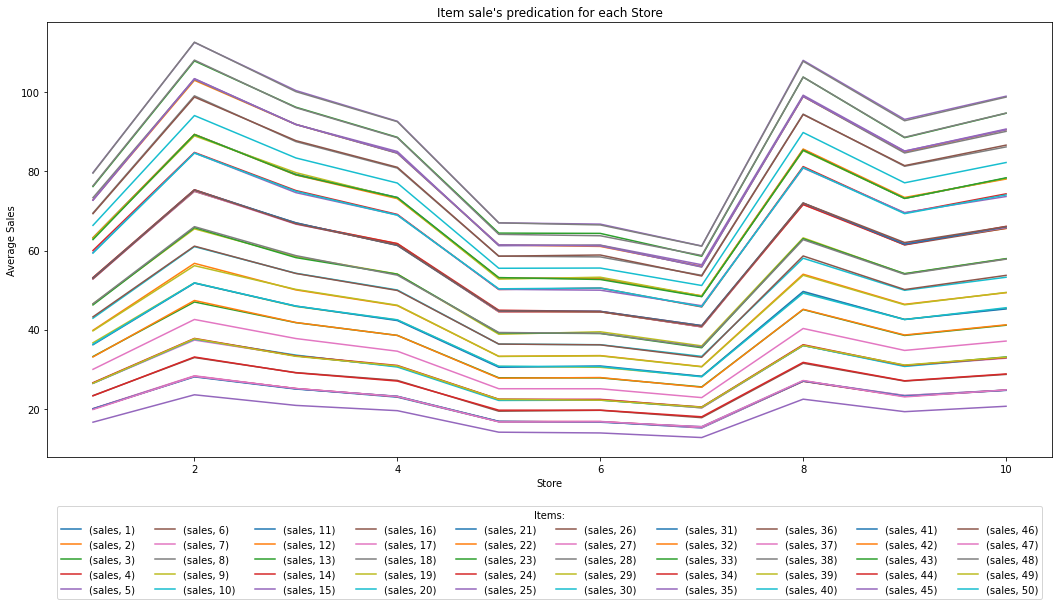

In [19]:
# Plotting a graph for better understanding
gb_sale_pred = df_train.groupby(['store','item']).agg({'sales':'mean'})
gb_sale_pred = gb_sale_pred.pivot_table(index="store", columns="item", values=["sales"])
gb_sale_pred.plot(figsize=(18,8), legend = False)
plt.title("Item sale's predication for each Store")
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.legend(title = 'Items:',ncol = 10,loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.show()

**Data Visualization** 

In [20]:
# Set the date as index for easy visalization w.r.t time 
df1_train = df_train.set_index('date')
# Select the proper time period for sale aggreagation
daily = df1_train.resample('D').sum()
weekly = df1_train.resample('W').sum()
monthly = df1_train.resample('M').sum()

**Note:** Resampling generates a unique sampling distribution on the basis of the actual data. We can apply various frequency to resample our time series data.

**Daily-Monthly sales relation**

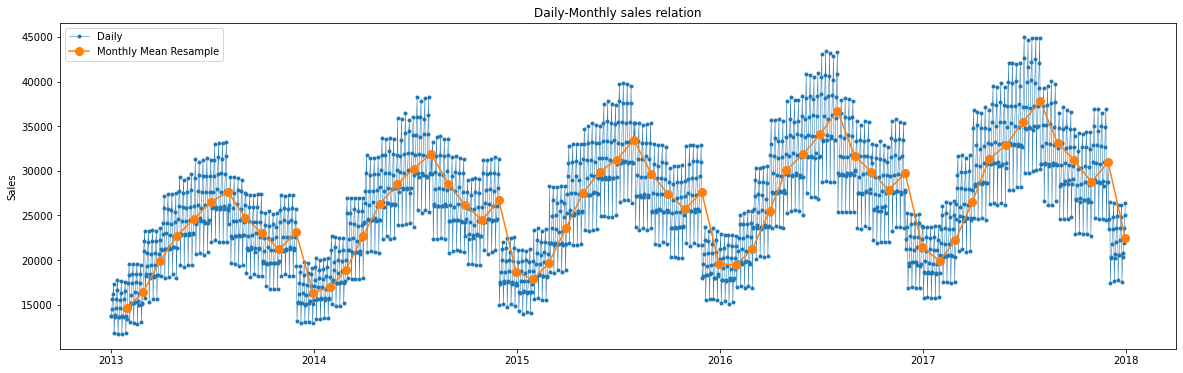

In [21]:
y_DS = daily['sales']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y_DS,marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(y_DS.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_title('Daily-Monthly sales relation')
ax.set_ylabel('Sales')
ax.legend();

**Daily-Weekly sales relation**

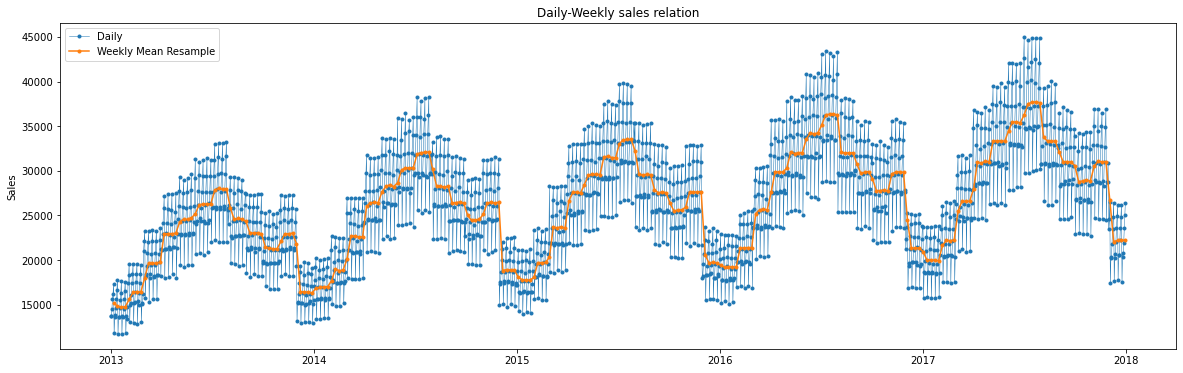

In [22]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y_DS,marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(y_DS.resample('W').mean(),marker='o', markersize=3, linestyle='-', label='Weekly Mean Resample')
ax.set_title('Daily-Weekly sales relation')
ax.set_ylabel('Sales')
ax.legend();

**Daily-Yearly sales relation**

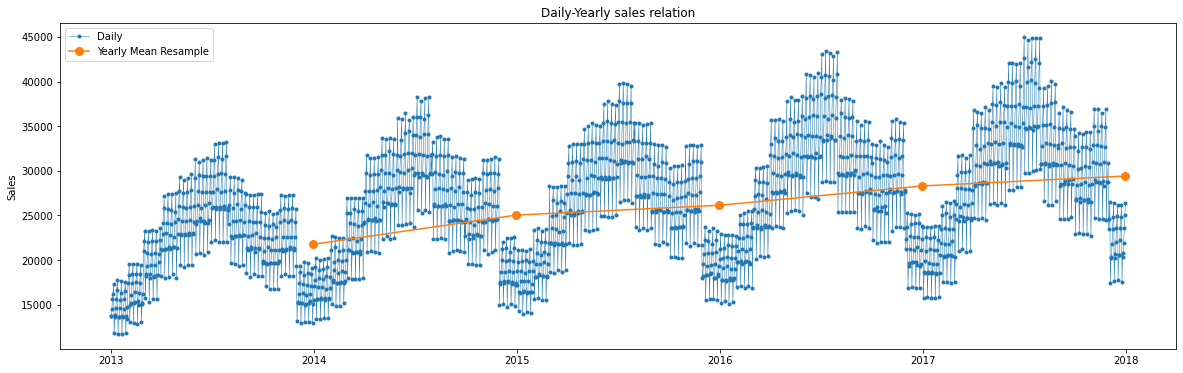

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y_DS,marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(y_DS.resample('Y').mean(),marker='o', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_title('Daily-Yearly sales relation')
ax.set_ylabel('Sales')
ax.legend();

**Monthly-Yearly sales relation**

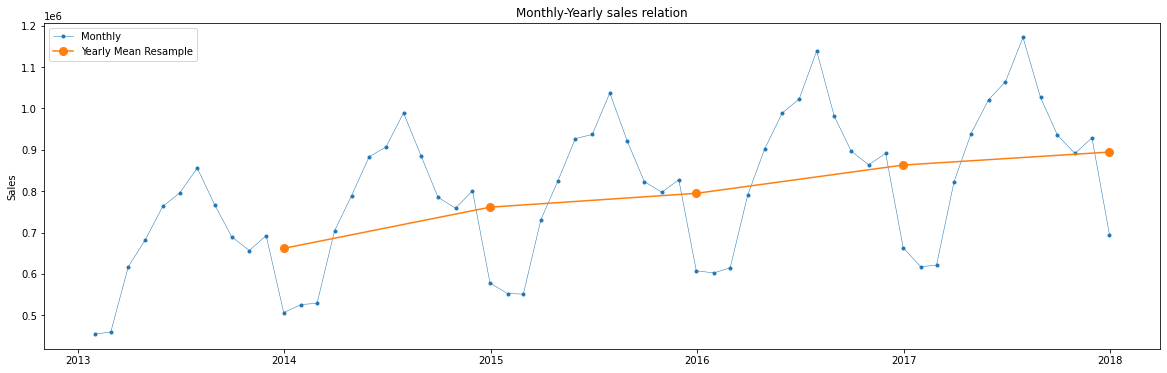

In [24]:
y_MS = monthly['sales']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y_MS,marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(y_MS.resample('Y').mean(),marker='o', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_title('Monthly-Yearly sales relation')
ax.set_ylabel('Sales')
ax.legend();

##### Relation between the Store's daily sales

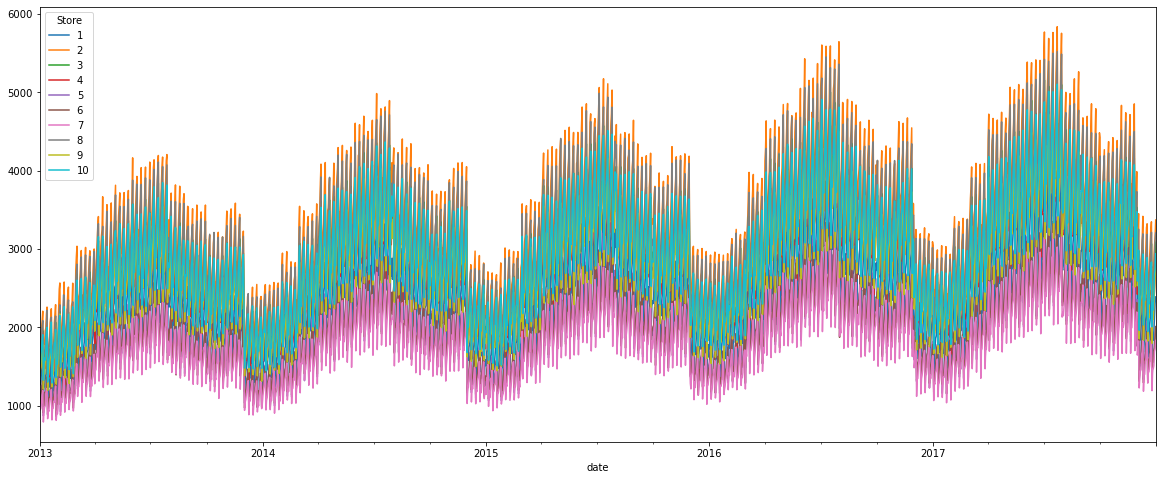

In [25]:
fig, ax = plt.subplots(figsize=(20,8))

df_train.groupby(['date','store'])['sales'].sum().unstack().plot(ax=ax)
ax.legend(title = 'Store')
plt.show()

##### Relation of the Item's daily sales

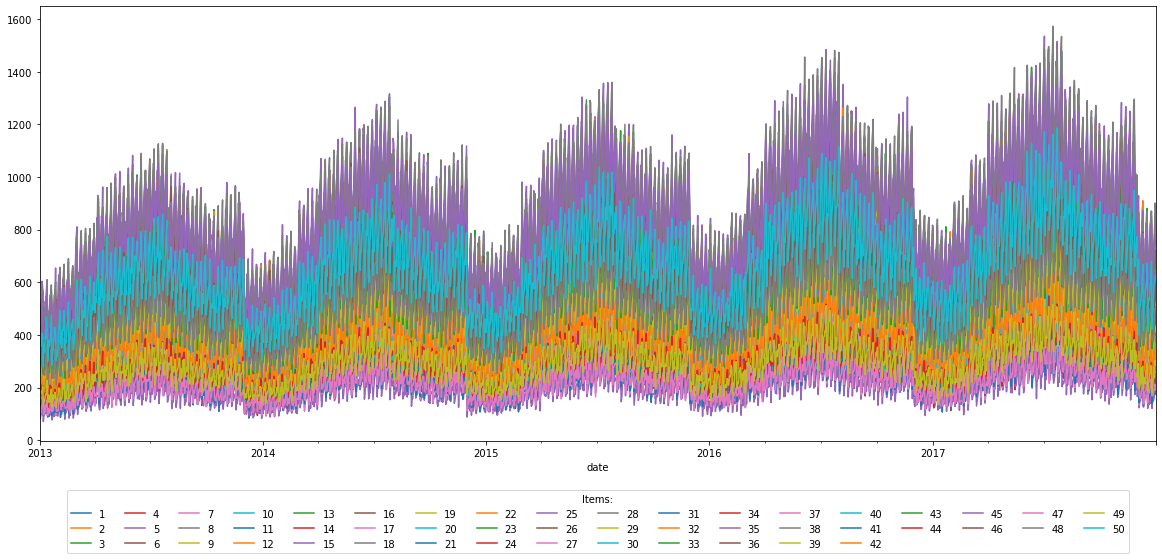

In [26]:
# plot data
fig, ax = plt.subplots(figsize=(20,8))
# use unstack()
df_train.groupby(['date','item'])['sales'].sum().unstack().plot(ax=ax, legend=False)
plt.legend(title = 'Items:',ncol = 18,loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.show() 

##### Relation between Stores and Items daily sales 

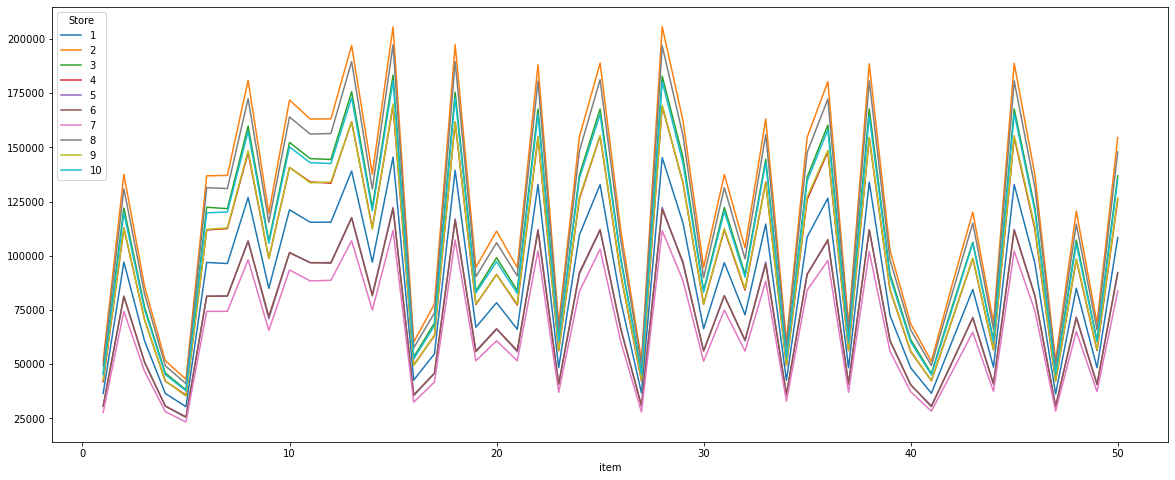

In [27]:
fig, ax = plt.subplots(figsize=(20,8))

df_train.groupby(['item','store'])['sales'].sum().unstack().plot(ax=ax)
ax.legend(title = 'Store')
plt.show()

##### Insights

- Sales volume across all items and stores were very similar.
- There is a little bit of seasonality.
- Trend is going in upward direction.
- Weekly and yearly seasonal patterns were consistent for every store-item combination and the trend stable too.
- It appears July is the high(middle of each year) and January is low each year(start of each year).

##### Decomposing the Data

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting

Components of the time series:-

**Stationary:** A time series is stationary if the statistical characteristics doen't change over time period.

**Trend:** A time series is said to have a trend when there is a persistent increasing or decreasing direction in the data. 

**Seasonality:** A seasonal pattern exists when a time series is influenced by seasonal factors.    

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

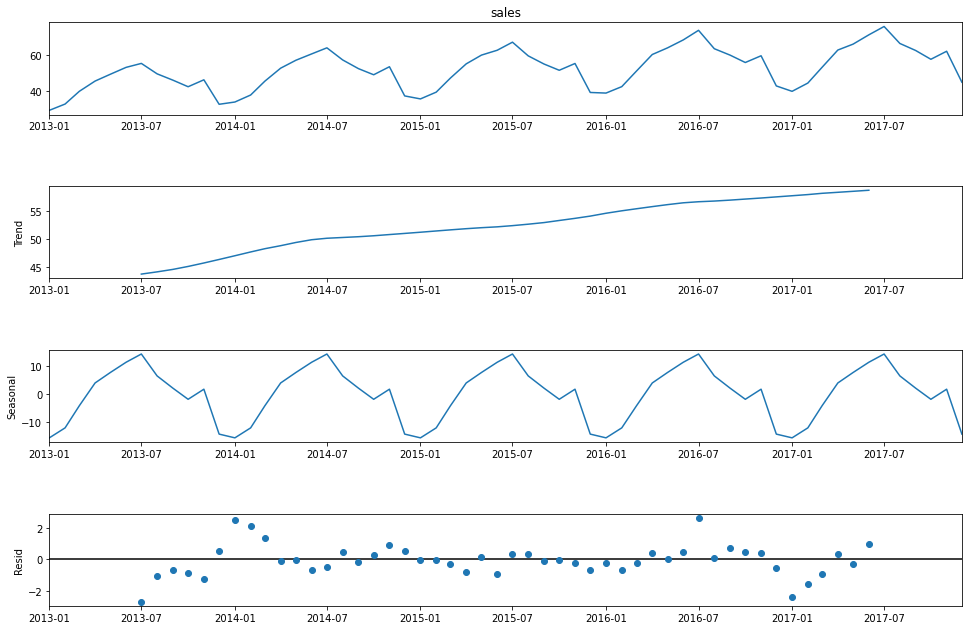

In [29]:
df_MS = df1_train['sales'].resample('MS').mean()

decompo_add = seasonal_decompose(df_MS, model='additive')
fig = decompo_add.plot()
fig.set_size_inches(15,10)
plt.show()

- 1st graph: the dataset is not stationary, it would be easier to have a future prediction simply by taking mean values if it was stationary,
- 2nd graph: there is an increasing trend over time,
- 3rd graph: a repeating pattern is observed, so there is seasonality- moving upwards on July.
- 4th graph: residuals are decomposing randomly around 0, so the series is additive.

From the graphs we can say that the time series is non-stationary(has a time-dependent structure). But, we will also validate the same.Two common methods to check for stationarity are Visualization and the Augmented Dickey-Fuller (ADF) Test.

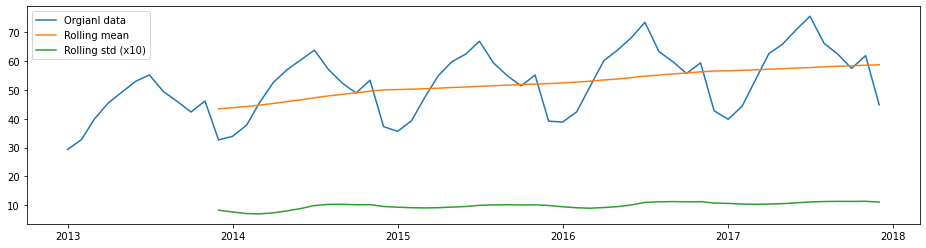

In [30]:
# Ploting graph for understanding the stationarity
rolmean = pd.Series(df_MS).rolling(window=12).mean()
rolstd = pd.Series(df_MS).rolling(window=12).std()

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(df_MS, label= 'Orgianl data')
ax.plot(rolmean, label='Rolling mean')
ax.plot(rolstd, label='Rolling std (x10)')
ax.legend()
plt.show()

In [31]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

# Null Hypothesis (Ho): The given time series is non-stationary.
# Alternate Hypothesis (Ha): The time series is stationary.

X = df_MS
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.382140
p-value: 0.000004
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


**Insights**
- As p-value <= 0.05: We reject the null hypothesis (Ho), the data is stationary.
- However, the series clearly shows trend and seasonality when checked visually.    

### Pre-processing 

We will join the test dataset to the train dataset and perform the pre-processing and finaly split it back to the test dataset for prediction.

In [32]:
df_new = pd.concat([df_train, df_test], sort=False) # join test and train for data preprocessing
df_new.head()

date  store  item  sales  id
0 2013-01-01      1     1   13.0 NaN
1 2013-01-02      1     1   11.0 NaN
2 2013-01-03      1     1   14.0 NaN
3 2013-01-04      1     1   13.0 NaN
4 2013-01-05      1     1   10.0 NaN

In [33]:
print('The starting date in the dataset',df_new['date'].min().date())
print('The ending date in the dataset',df_new['date'].max().date())

The starting date in the dataset 2013-01-01
The ending date in the dataset 2018-03-31


##### Feature Engineering

- There were only 4 variables originally but to build a better model we will derive new features and different time periods

In [34]:
# sales made on which month
df_new['month'] = df_new.date.dt.month
# sales made on which day of the month
df_new['day_of_month'] = df_new.date.dt.day
# sales made on which day of the year
df_new['day_of_year'] = df_new.date.dt.dayofyear 
# sales made on which week of the month
df_new['week_of_year'] = df_new.date.dt.weekofyear
# sales made on which day of the week
df_new['day_of_week'] = df_new.date.dt.dayofweek
# sale made on which year
df_new['year'] = df_new.date.dt.year
# the day is weekend or not
df_new["is_wknd"] = df_new.date.dt.weekday // 4
# the day is at the beginning of the month
df_new['is_month_start'] = df_new.date.dt.is_month_start.astype(int)
# the day is at the end of the month
df_new['is_month_end'] = df_new.date.dt.is_month_end.astype(int) 

In [35]:
df_new.head()

date  store  item  sales  id  month  day_of_month  day_of_year  \
0 2013-01-01      1     1   13.0 NaN      1             1            1   
1 2013-01-02      1     1   11.0 NaN      1             2            2   
2 2013-01-03      1     1   14.0 NaN      1             3            3   
3 2013-01-04      1     1   13.0 NaN      1             4            4   
4 2013-01-05      1     1   10.0 NaN      1             5            5   

   week_of_year  day_of_week  year  is_wknd  is_month_start  is_month_end  
0             1            1  2013        0               1             0  
1             1            2  2013        0               0             0  
2             1            3  2013        0               0             0  
3             1            4  2013        1               0             0  
4             1            5  2013        1               0             0

In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            958000 non-null  datetime64[ns]
 1   store           958000 non-null  int64         
 2   item            958000 non-null  int64         
 3   sales           913000 non-null  float64       
 4   id              45000 non-null   float64       
 5   month           958000 non-null  int64         
 6   day_of_month    958000 non-null  int64         
 7   day_of_year     958000 non-null  int64         
 8   week_of_year    958000 non-null  int64         
 9   day_of_week     958000 non-null  int64         
 10  year            958000 non-null  int64         
 11  is_wknd         958000 non-null  int64         
 12  is_month_start  958000 non-null  int32         
 13  is_month_end    958000 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int

##### Random Noise

In order to avoid overfitting, random noise can be added to the values. We use Gaussian random noise which is normally distributed with a standard deviation of 1 and mean of 0.

In [37]:
def random_noise(dataframe):
    return np.random.normal(size=(len(dataframe),))

##### Lag/Shifted Features

Time Series theory states that, the value in time: t highly depends on the value in time: t-1. That is why I will be shifting all the sales values by 1 and adding noise.

In [38]:
# sort the values per store, item and date so that values would be shifted equally

df_new.sort_values(by=['store', 'item', 'date'], axis=0, inplace=True)

# the feature name will be created dynamically with regards to the lag value for a given list of lags

def lag_features(dataframe, lags):
    for lag in lags:
        dataframe['sales_lag_' + str(lag)] = dataframe.groupby(["store", "item"])['sales'].transform(
            lambda x: x.shift(lag)) + random_noise(dataframe)
    return dataframe

df_new = lag_features(df_new, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])

##### Rolling Mean / Moving Average

We use moving average (MA) which is a simple technical analysis tool that smooths out sale data by creating a constantly updated average sale.

In [39]:
# Moving Averages
def roll_mean_features(dataframe, windows):
    for window in windows:
        dataframe['sales_roll_mean_' + str(window)] = dataframe.groupby(["store", "item"])['sales']. \
                                                          transform(
            lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean()) + random_noise(dataframe)
    return dataframe

df_new = roll_mean_features(df_new, [365, 546, 730])

##### Exponentially Weighted Mean Features

The value in time 't' highly depends on the value in time 't-1', so in order to have a better prediction, while computing the average value, the values should not be equally weighted.

In [40]:
# Exponential Weighted Average Features
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['sales_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["store", "item"])['sales'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe


alphas = [0.99, 0.95, 0.9, 0.8, 0.7, 0.5]
lags = [91, 98, 105, 112, 180, 270, 365, 546, 728]

df_new = ewm_features(df_new, alphas, lags)

In this function, values will be shifted by the given lags (number of days to be used for calculation) and the values will be weighted (using the alpha value) and the mean weighted value is obtained. Alpha is a parameter that is between 0 and 1, when close to 1 the near past will be weighted more and oppositely when close to 0 the far past will be weighted more.

In [41]:
df_new.head()

date  store  item  sales  id  month  day_of_month  day_of_year  \
0 2013-01-01      1     1   13.0 NaN      1             1            1   
1 2013-01-02      1     1   11.0 NaN      1             2            2   
2 2013-01-03      1     1   14.0 NaN      1             3            3   
3 2013-01-04      1     1   13.0 NaN      1             4            4   
4 2013-01-05      1     1   10.0 NaN      1             5            5   

   week_of_year  day_of_week  ...  sales_ewm_alpha_07_lag_728  \
0             1            1  ...                         NaN   
1             1            2  ...                         NaN   
2             1            3  ...                         NaN   
3             1            4  ...                         NaN   
4             1            5  ...                         NaN   

   sales_ewm_alpha_05_lag_91  sales_ewm_alpha_05_lag_98  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                        NaN   

   sales_ewm_alpha_05_lag_105  sales_ewm_alpha_05_lag_112  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   sales_ewm_alpha_05_lag_180  sales_ewm_alpha_05_lag_270  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   sales_ewm_alpha_05_lag_365  sales_ewm_alpha_05_lag_546  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   sales_ewm_alpha_05_lag_728  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  

[5 rows x 81 columns]

In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   date                         958000 non-null  datetime64[ns]
 1   store                        958000 non-null  int64         
 2   item                         958000 non-null  int64         
 3   sales                        913000 non-null  float64       
 4   id                           45000 non-null   float64       
 5   month                        958000 non-null  int64         
 6   day_of_month                 958000 non-null  int64         
 7   day_of_year                  958000 non-null  int64         
 8   week_of_year                 958000 non-null  int64         
 9   day_of_week                  958000 non-null  int64         
 10  year                         958000 non-null  int64         
 11  is_wknd                    

##### One-Hot Encoding

In [43]:
# We will encode the colums 'day_of_week', 'month', 'is_wknd', 'is_month_start' ,'is_month_end'
df_encod = pd.get_dummies(df_new, columns=['day_of_week', 'month', 'is_wknd', 'is_month_start' ,'is_month_end'])

In [44]:
df_encod.shape

(958000, 101)

Hence, after the pre-processing, we now have 101 columns and 958000 rows.

# Model

In regression problems using gradient descent optimisation, when the target value is higher, the number of iterations would decrease and so the computation time. In order to overcome this, we will be taking the logaritmic values of the target value.

In [45]:
df_encod['sales'] = np.log1p(df_encod["sales"])

**Custom Cost Function**
 
 Now we will define a custom cost function which is based on SMAPE which reverses the log values and calculates the SMAPE.

**SMAPE:** Symmetric mean absolute percentage error (SMAPE or sMAPE) is an accuracy measure based on percentage (or relative) errors. Errors with higher values will be adjusted by diving it to the sum of the forecast and actual value's average.

The lower the SMAPE value of a forecast, the higher its accuracy.

In [46]:
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

##### Train-Validation Split

In [47]:
# Train set until the beginning of 2017 (until the end of 2016).
train = df_encod.loc[(df_encod["date"] < "2017-01-01"), :]

# First 3 months of 2017 validation set.
val = df_encod.loc[(df_encod["date"] >= "2017-01-01") & (df_encod["date"] < "2017-04-01"), :]

# Independent variables
cols = [col for col in train.columns if col not in ['date', 'id', "sales", "year"]] # columns with no useful information will be dropped.

In [48]:
# Selecting the dependent variable for the train set
Y_train = train['sales']

# Selecting the argument for the train set
X_train = train[cols]

# choosing the dependent variable for the validation set
Y_val = val['sales']

# selecting the independent variable for the validation set
X_val = val[cols] 

print('Train & Validation split datasets shapes:')
X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

Train & Validation split datasets shapes:


((730500, 97), (730500,), (45000, 97), (45000,))

### LightGBM Model

LightGBM is a popular machine learning algorithm that is generally applied to tabular data for the time series model 

Advantages:
- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel, distributed, and GPU learning.
- Capable of handling large-scale data.

In [49]:
# Customized evaluation function
def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'SMAPE', smape_val, False

##### Base Model

In [50]:
# Set the LightGBM parameters
lgb_params = {'metric': {'mae'},
              'num_leaves': 10,
              'learning_rate': 0.02,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': 0,
              'num_boost_round': 10000,
              'early_stopping_rounds': 200,
              'nthread': -1}

In [51]:
# importing the necessary libraries 
import lightgbm as lgb

# setting train and validation dataset for the model
lgbtrain = lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)
lgbval = lgb.Dataset(data=X_val, label=Y_val, reference=lgbtrain, feature_name=cols)

# building the model and training
model = lgb.train(lgb_params, lgbtrain,
                  valid_sets=[lgbtrain, lgbval],
                  num_boost_round=lgb_params['num_boost_round'],
                  early_stopping_rounds=lgb_params['early_stopping_rounds'],
                  feval=lgbm_smape, 
                  verbose_eval=100)

# predicting the sales values from the train validation dataset
y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.161603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 200 rounds
[100]	training's l1: 0.170667	training's SMAPE: 17.4091	valid_1's l1: 0.171565	valid_1's SMAPE: 17.5353
[200]	training's l1: 0.140447	training's SMAPE: 14.3869	valid_1's l1: 0.144964	valid_1's SMAPE: 14.8715
[300]	training's l1: 0.134948	training's SMAPE: 13.8357	valid_1's l1: 0.14006	valid_1's SMAPE: 14.3793
[400]	training's l1: 0.132904	training's SMAPE: 13.6314	valid_1's l1: 0.1384	valid_1's SMAPE: 14.2133
[500]	training's l1: 0.131723	training's SMAPE: 13.513	valid_1's l1: 0.137031	valid_1's SMAPE: 14.0757
[600]	training's l1: 0.13092	training's SMAPE: 13.4323	valid_1's l1: 0.13607	valid_1's SMAPE: 13.9789
[700]	training's l1: 0.13032	training's SMAPE: 13.3723	valid_1's l1: 0.135284	valid_1's SMA

In [52]:
# percentage of validation error
lgb_smape = smape(np.expm1(y_pred_val), np.expm1(Y_val))
print('SMAPE:', lgb_smape)

SMAPE: 13.459342838076847


##### Final Model

In [53]:
# Train and Test split to its orginal state, that means the shape of orginal test and train datasets

train = df_encod.loc[~df_encod.sales.isna()] # Filtering by removing the nan rows of sales column
X_train = train[cols]
Y_train = train['sales']

test = df_encod.loc[df_encod.sales.isna()] # Making the test dataset by 
X_test = test[cols]

print('Train & Validation split datasets shapes:')
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

Train & Validation split datasets shapes:


((913000, 97), (913000,), (45000, 97), (45000,))

In [54]:
# LightGBM parameters for final model
lgb_params = {'metric': {'mae'},
              'num_leaves': 10,
              'learning_rate': 0.02,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': 0,
              'nthread': -1,
              "num_boost_round": model.best_iteration}

In [55]:
# Setting the data to be trained on
lgb_train = lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)
# Building the model
lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=model.best_iteration)
# Predicting future sales
lgb_preds = lgb_model.predict(X_test, num_iteration=model.best_iteration)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.715073 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [56]:
# converting the logaritmic values
lgb_sale_preds = np.expm1(lgb_preds)
lgb_sale_preds

array([11.79752701, 13.96120981, 13.93645113, ..., 79.40363601,
       84.59323328, 85.83197325])

##### Sales predictions

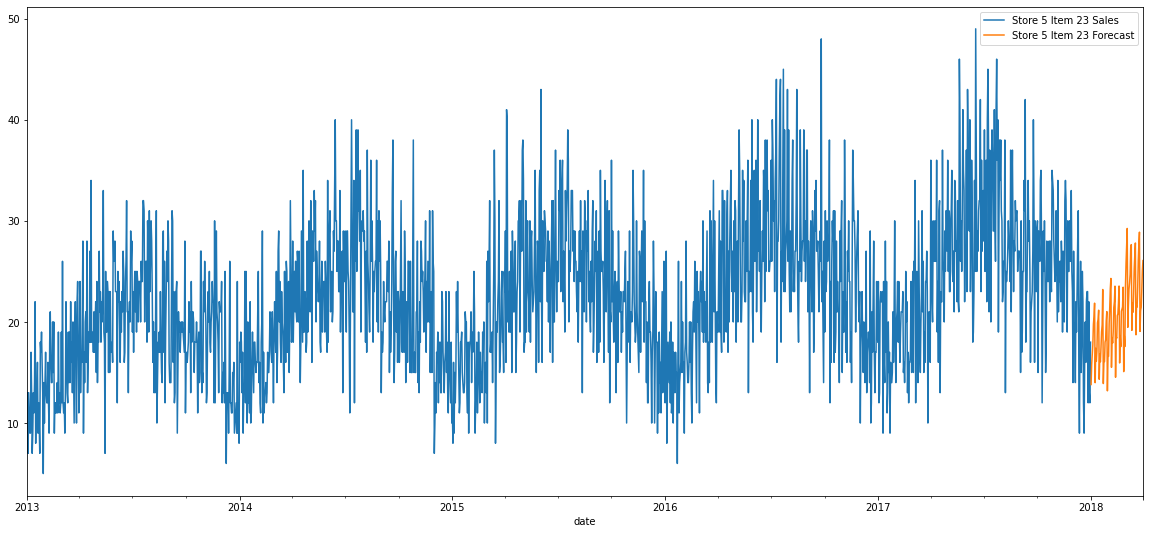

In [57]:
# Estimates for the 5th store's 23rd products
forecast1 = pd.DataFrame({"date":test["date"],
                        "store":test["store"],
                        "item":test["item"],
                        "sales":lgb_sale_preds
                        })

# Predicted sales for the 23 item in the 5th store
df_train[(df_train.store == 5) & (df_train.item == 23)].set_index("date").sales.plot(figsize = (20,9),legend=True, label = "Store 5 Item 23 Sales")
forecast1[(forecast1.store == 5) & (forecast1.item == 23)].set_index("date").sales.plot(legend=True, label = "Store 5 Item 23 Forecast");

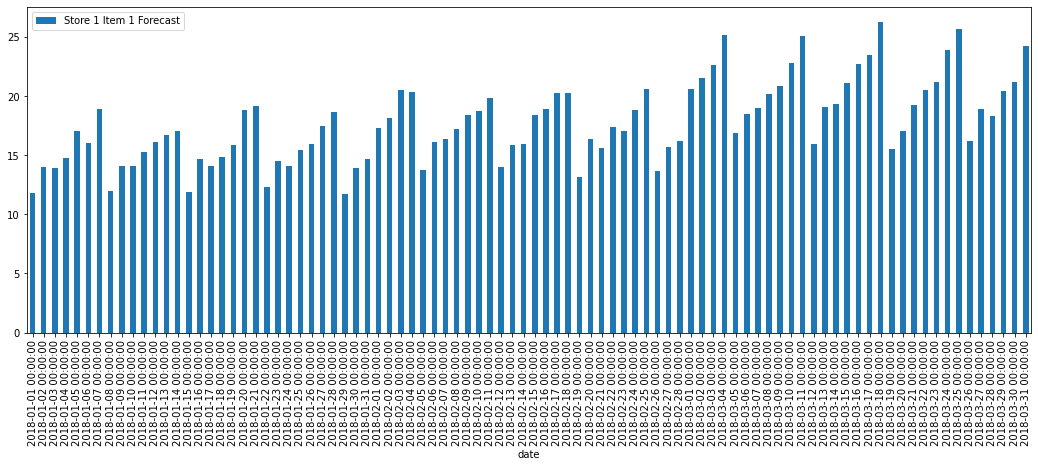

In [58]:
# Store 1 Item 1 Forecast for year 2018
forecast1[(forecast1.store == 1) & (forecast1.item == 1)].set_index("date").sales.plot.bar(figsize = (18,6),legend=True, label = "Store 1 Item 1 Forecast");

### XGBmodel

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. 

Advantages:
- Highly Flexible
- It uses the power of parallel processing
- Faster than Gradient Boosting
- Supports regularization
- Designed to handle missing data with its in-build features.
- Can run a cross-validation after each iteration.    

In [59]:
# Train set until the beginning of 2017 (until the end of 2016).
train = df_encod.loc[(df_encod["date"] < "2017-01-01"), :]

# First 3 months of 2017 validation set.
val = df_encod.loc[(df_encod["date"] >= "2017-01-01") & (df_encod["date"] < "2017-04-01"), :]

# Independent variables
cols = [col for col in train.columns if col not in ['date', 'id', "sales", "year"]] # columns with no useful information will be dropped.

In [60]:
# Selecting the dependent variable for the train set
Y_train = train['sales']

# Selecting the argument for the train set
X_train = train[cols]

# choosing the dependent variable for the validation set
Y_val = val['sales']

# selecting the independent variable for the validation set
X_val = val[cols] 

# train validation split datasets shapes
Y_train.shape, X_train.shape, Y_val.shape, X_val.shape

((730500,), (730500, 97), (45000,), (45000, 97))

In [61]:
# importing the necessary libraries 
import xgboost as xgb

# setting train and validation dataset for the model
matrix_train = xgb.DMatrix(X_train,label=Y_train)
matrix_val = xgb.DMatrix(X_val,label=Y_val)

# building the model and training
xgb_model=xgb.train(params={'objective':'reg:squarederror','eval_metric':'mae'}
                  ,dtrain=matrix_train,num_boost_round=500, 
                    early_stopping_rounds=20,evals=[(matrix_val,'Vali')],)

# predicting the sales values from the train validation dataset
y_pred_val1 = xgb_model.predict(matrix_val, ntree_limit = xgb_model.best_ntree_limit)

[0]	Vali-mae:2.22200
[1]	Vali-mae:1.52866
[2]	Vali-mae:1.05050
[3]	Vali-mae:0.71942
[4]	Vali-mae:0.49453
[5]	Vali-mae:0.34514
[6]	Vali-mae:0.25016
[7]	Vali-mae:0.19381
[8]	Vali-mae:0.16457
[9]	Vali-mae:0.14959
[10]	Vali-mae:0.14266
[11]	Vali-mae:0.13993
[12]	Vali-mae:0.13880
[13]	Vali-mae:0.13849
[14]	Vali-mae:0.13837
[15]	Vali-mae:0.13858
[16]	Vali-mae:0.13871
[17]	Vali-mae:0.13843
[18]	Vali-mae:0.13847
[19]	Vali-mae:0.13842
[20]	Vali-mae:0.13842
[21]	Vali-mae:0.13812
[22]	Vali-mae:0.13814
[23]	Vali-mae:0.13775
[24]	Vali-mae:0.13767
[25]	Vali-mae:0.13745
[26]	Vali-mae:0.13743
[27]	Vali-mae:0.13729
[28]	Vali-mae:0.13720
[29]	Vali-mae:0.13688
[30]	Vali-mae:0.13693
[31]	Vali-mae:0.13695
[32]	Vali-mae:0.13675
[33]	Vali-mae:0.13670
[34]	Vali-mae:0.13665
[35]	Vali-mae:0.13640
[36]	Vali-mae:0.13633
[37]	Vali-mae:0.13628
[38]	Vali-mae:0.13618
[39]	Vali-mae:0.13617
[40]	Vali-mae:0.13607
[41]	Vali-mae:0.13601
[42]	Vali-mae:0.13594
[43]	Vali-mae:0.13592
[44]	Vali-mae:0.13592
[45]	Vali-mae:0.1358

In [62]:
# percentage of validation error
xgb_smape = smape(np.expm1(y_pred_val1), np.expm1(Y_val))
print('SMAPE:', xgb_smape)

SMAPE: 13.765506455266964


In [63]:
# Train and Test split to its orginal state, that means the shape of orginal test and train datasets

train = df_encod.loc[~df_encod.sales.isna()] # Filtering by removing the nan rows of sales column
X_train = train[cols]
Y_train = train['sales']

test = df_encod.loc[df_encod.sales.isna()] # Making the test dataset by 
X_test = test[cols]

print('Train & Validation split datasets shapes:')
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

Train & Validation split datasets shapes:


((913000, 97), (913000,), (45000, 97), (45000,))

In [64]:
# Predicting future sales
y_pred_val = xgb_model.predict(xgb.DMatrix(X_test,label=y_pred_val1), ntree_limit = xgb_model.best_ntree_limit)

In [65]:
# converting the logaritmic values
sale_preds_xgb = np.expm1(y_pred_val)
sale_preds_xgb

array([12.391695, 14.781723, 14.133392, ..., 80.760735, 89.93494 ,
       84.16366 ], dtype=float32)

##### Sales predictions

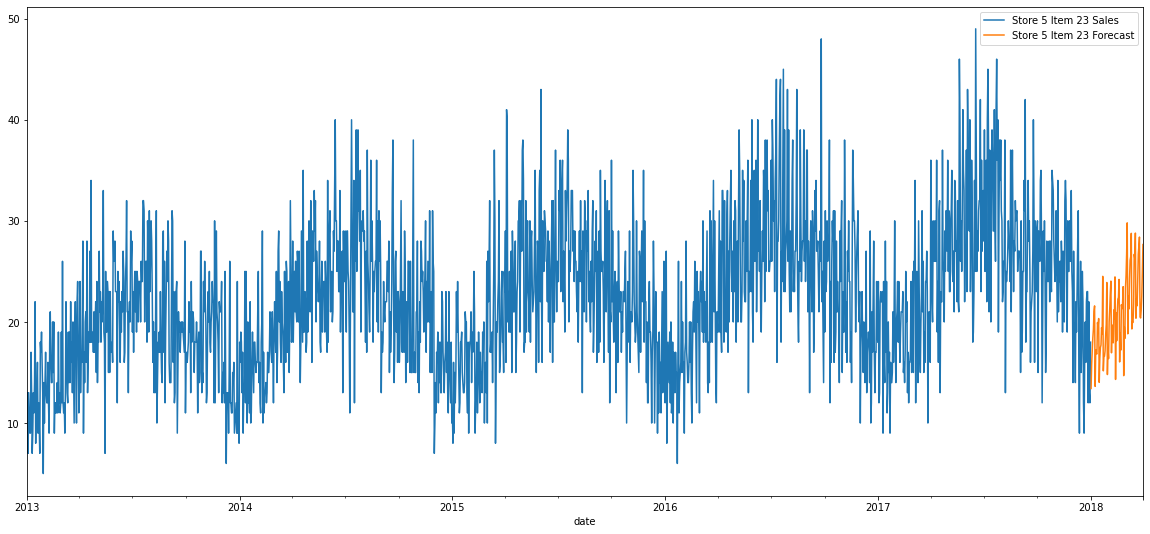

In [66]:
# Estimates for the 5th store's 23rd products
forecast2 = pd.DataFrame({"date":test["date"],
                        "store":test["store"],
                        "item":test["item"],
                        "sales":sale_preds_xgb
                        })

# Predicted sales for the 23 item in the 5th store

df_train[(df_train.store == 5) & (df_train.item == 23)].set_index("date").sales.plot(figsize = (20,9),legend=True, label = "Store 5 Item 23 Sales")
forecast2[(forecast2.store == 5) & (forecast2.item == 23)].set_index("date").sales.plot(legend=True, label = "Store 5 Item 23 Forecast");

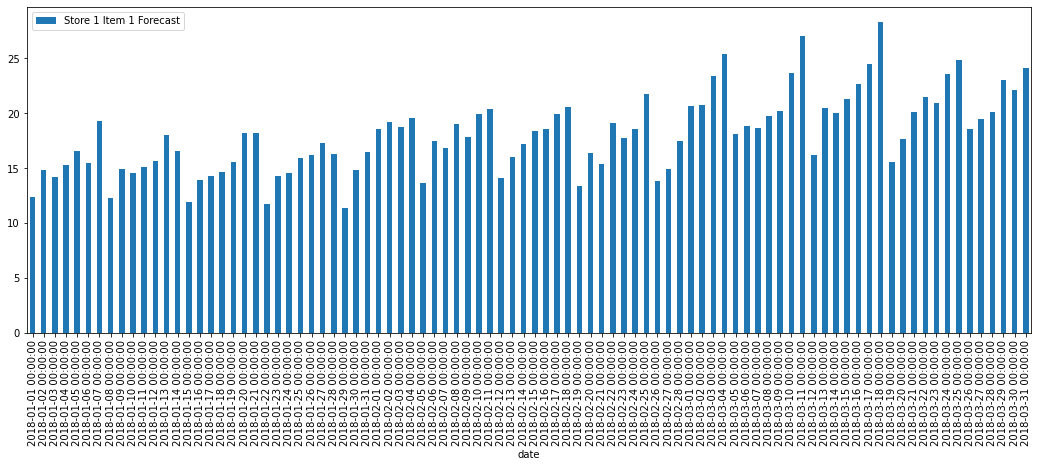

In [67]:
# Store 1 Item 1 Forecast for year 2018
forecast2[(forecast2.store == 1) & (forecast2.item == 1)].set_index("date").sales.plot.bar(figsize = (18,6),legend=True, label = "Store 1 Item 1 Forecast");

### ARIMA, SARIMA

In [7]:
df_train = pd.read_csv(r'E:\ICT\Intership\Dataset\demand-forecasting\train.csv', parse_dates=['date'])
df_test = pd.read_csv(r'E:\ICT\Intership\Dataset\demand-forecasting\test.csv', parse_dates=['date'])

In [8]:
df_train1 = df_train.set_index('date')
df_test1 = df_test.set_index('date')

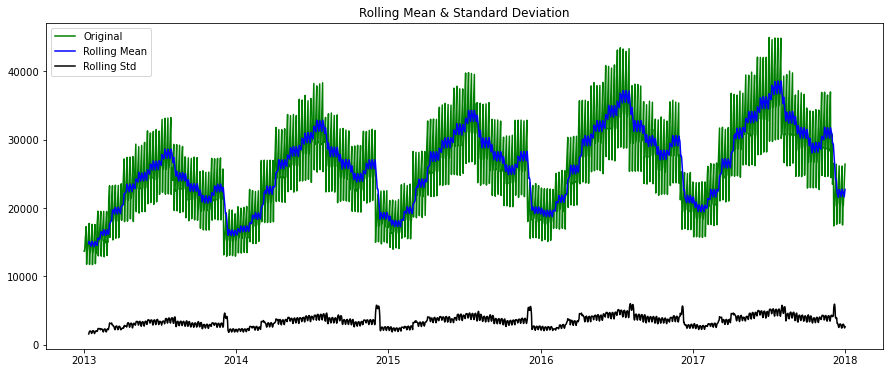

In [70]:
#Determing rolling statistics
rolmean = daily['sales'].rolling(window=12).mean()
rolstd = daily['sales'].rolling(window=12).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(15, 6))
orig = plt.plot(daily['sales'], color='green',label='Original')
mean = plt.plot(rolmean, color='blue', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [71]:
# To get a stationary data, there's many approaches. We’ll try de-trending and differencing

##### Use of differencing method 

In [72]:
first_diff = daily['sales'] - daily['sales'].shift(1)
first_diff = first_diff.dropna(inplace = False)

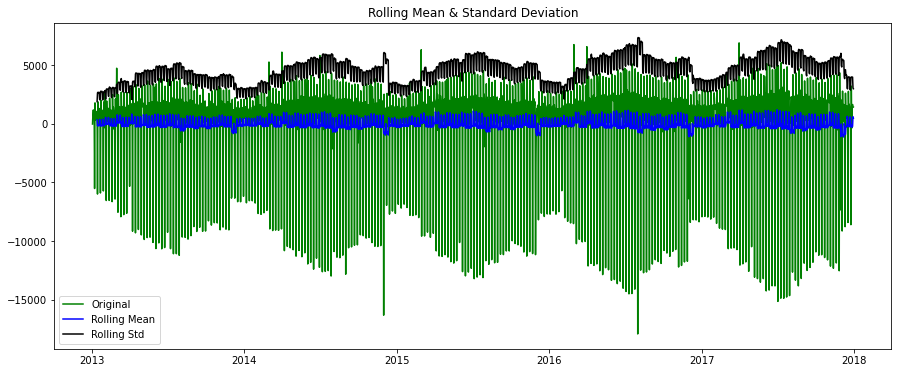

In [73]:
#Determing rolling statistics
rolmean = first_diff.rolling(window=12).mean()
rolstd = first_diff.rolling(window=12).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(15, 6))
orig = plt.plot(first_diff, color='green',label='Original')
mean = plt.plot(rolmean, color='blue', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

##### Use of de-trending method 

In [74]:
detrend =  (daily['sales'] - daily['sales'].rolling(window=12).mean())/daily['sales'].rolling(window=12).std()
detrend = detrend.dropna(inplace = False)

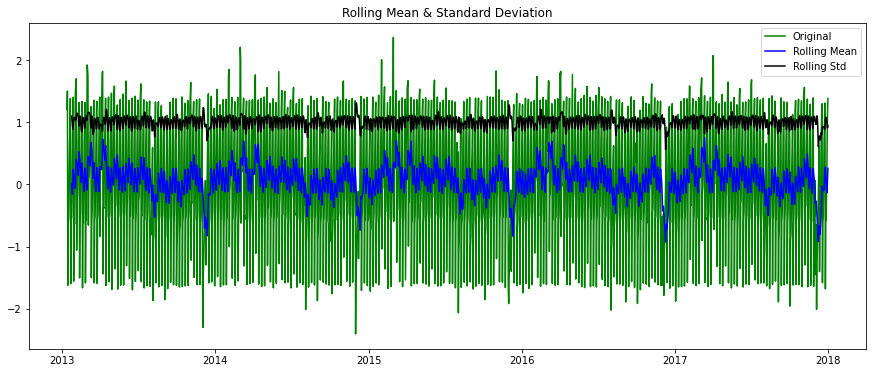

In [75]:
#Determing rolling statistics
rolmean = detrend.rolling(window=12).mean()
rolstd = detrend.rolling(window=12).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(15, 6))
orig = plt.plot(detrend, color='green',label='Original')
mean = plt.plot(rolmean, color='blue', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

- Note that after de-trending, the series seems very likely to be in stationary.

**Plot ACF and PACF function**

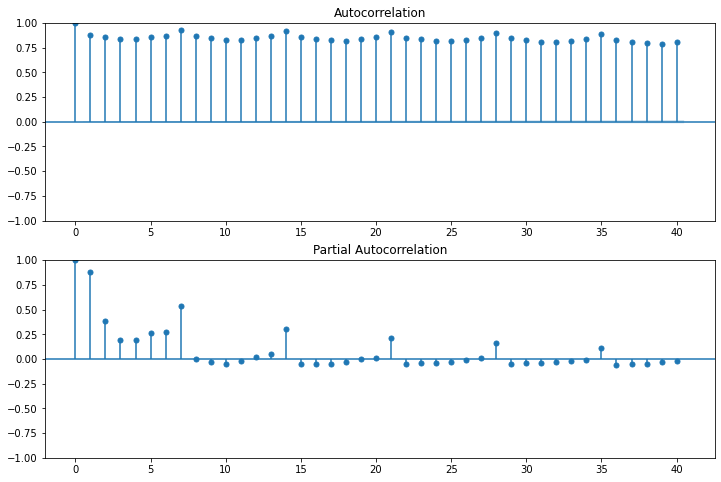

In [76]:
import statsmodels.api as sm

# Initial data before first-order differencing  
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_train1.sales, lags=40, ax=ax1)  
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_train1.sales, lags=40, ax=ax2)

In [77]:
first_diff = df_train1['sales'] - df_train1['sales'].shift(1)
first_diff = first_diff.dropna(inplace = False)

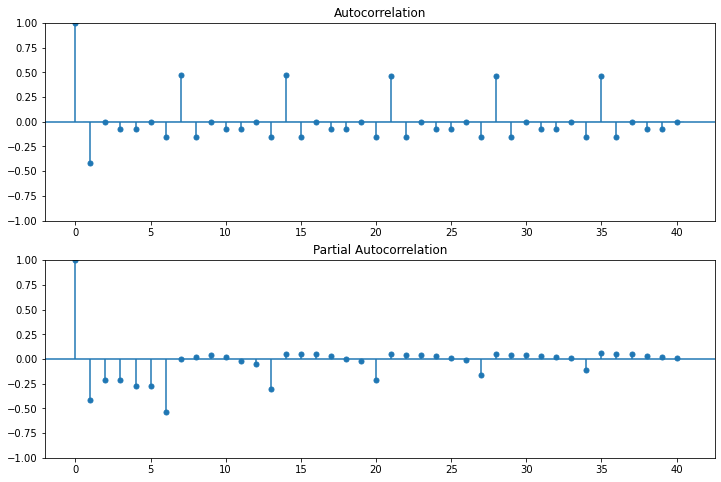

In [78]:
# data after first-order differencing 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

Finding p,d,q values:

        - For p, we can determine that p=6 as the AR term becomes significant after 6 time lags
        - We take d=1 since the train data achieved stationarity after 1st order differencing
        - We take q=0 in order to prevent the risk of wrong selection
- The ARIMA combination is ARIMA(6,1,0)    

**ARIMA Model**

ARIMA(Auto-Regressive Integrated Moving Average), is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

In [79]:
# Train and test split

In [80]:
# The years from start of 2013 to end of 2016 for the training.
train = df_train.loc[(df_train["date"] < "2017-01-01"), :]
train = train.set_index('date')
# First 3 months of 2017 validation set.
test = df_train.loc[(df_train["date"] >= "2017-01-01") & (df_train["date"] < "2017-04-01"), :]
val = test.set_index('date')
val['sales'] = 0
# shape of Train and Validation sets
train.shape, val.shape

((730500, 3), (45000, 3))

In [81]:
# importing the necessary library
from statsmodels.tsa.arima.model import ARIMA

In [82]:
# Model building, training the model and then testing it.
for s in val['store'].unique():
    for i in val['item'].unique():
        si = train.loc[(train['store'] == s) & (train['item'] == i), 'sales']
        arima = ARIMA(si, freq='D', enforce_invertibility=False, order=(6, 1, 0))
        results = arima.fit()
        fcst = results.predict(start='2016-12-31', end='2017-03-31', dynamic=True)
        val.loc[(val['store'] == s) & (val['item'] == i), 'sales'] = fcst.values[1:]

C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequenc

In [83]:
# percentage of validation error
y_pred_val1 = val['sales'].values
Y_val = test['sales'].values
arima_smape = smape(y_pred_val1, Y_val)
print('SMAPE:', arima_smape)

SMAPE: 20.539029295462683


In [84]:
# Predicting future sales

In [85]:
arima_results = df_test.set_index('date')
arima_results['sales'] = 0

In [86]:
for s in arima_results['store'].unique():
    for i in arima_results['item'].unique():
        si = df_train1.loc[(df_train1['store'] == s) & (df_train1['item'] == i), 'sales']
        arima = ARIMA(si, freq='D', enforce_invertibility=False, order=(6, 1, 0))
        results = arima.fit()
        fcst = results.predict(start='2017-12-31', end='2018-03-31', dynamic=True)
        arima_results.loc[(arima_results['store'] == s) & (arima_results['item'] == i), 'sales'] = fcst.values[1:]

C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequenc

In [87]:
# Predicated sale values
arima_results['sales']

date
2018-01-01    16.065891
2018-01-02    16.773356
2018-01-03    16.686468
2018-01-04    18.401586
2018-01-05    17.880797
                ...    
2018-03-27    60.744418
2018-03-28    60.768174
2018-03-29    60.808252
2018-03-30    60.838237
2018-03-31    60.834908
Name: sales, Length: 45000, dtype: float64

In [88]:
# Ploting the sales prediction for 2018

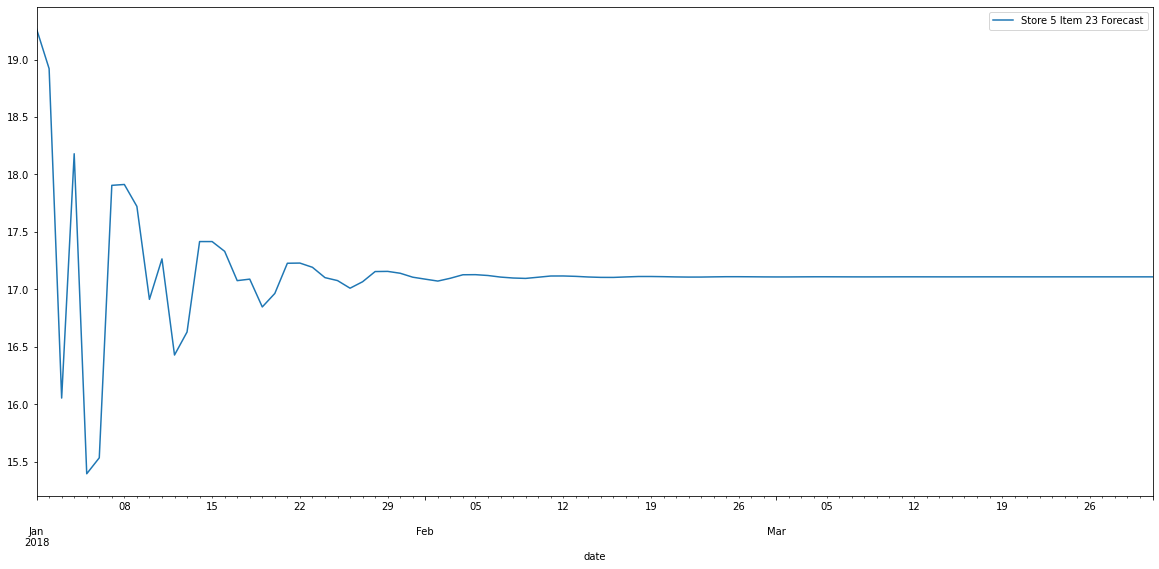

In [89]:
# Sale Forecast for Store 5 Item 23 
arima_results[(arima_results.store == 5) & (arima_results.item == 23)].sales.plot(figsize = (20,9),legend=True, label = "Store 5 Item 23 Forecast");

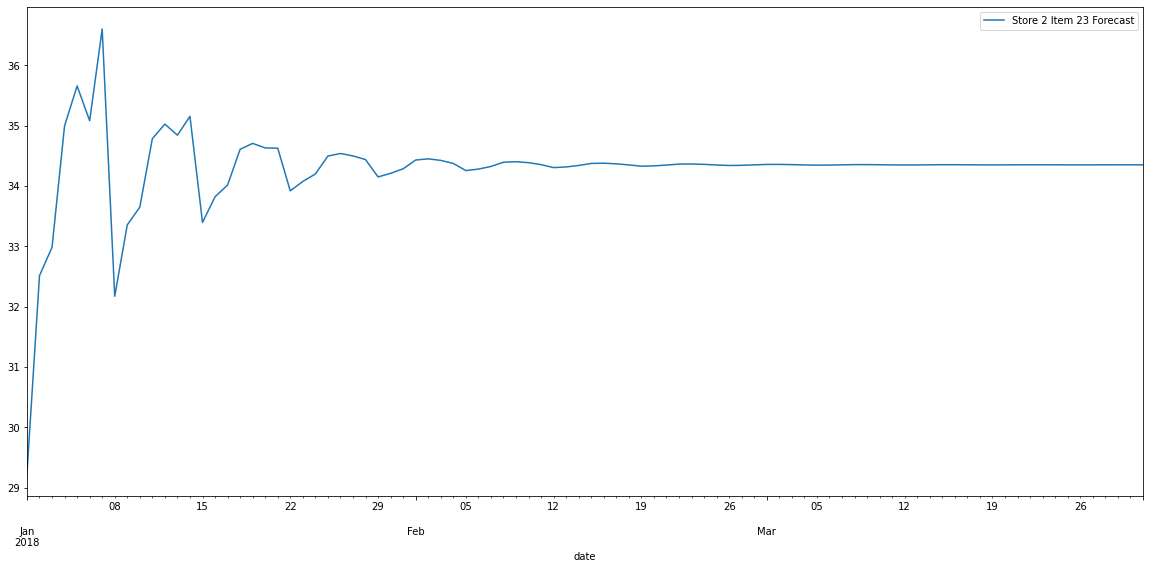

In [90]:
# Sale Forecast for Store 2 Item 23
arima_results[(arima_results.store == 2) & (arima_results.item == 23)].sales.plot(figsize = (20,9),legend=True, label = "Store 2 Item 23 Forecast");

##### SARIMA MODEL

SARIMA models are ARIMA models with a seasonal component (Seasonal ARIMA).

Since the SARIMA ratios of (P,D,Q) corresponds to that of the ARIMA values, we will use the same values obtained by our ARIMA model for our SARIMA model building, with a season value of 7 to represent a weekly series

In [9]:
# The years from start of 2013 to end of 2016 for the training.
train = df_train.loc[(df_train["date"] < "2017-01-01"), :]
train = train.set_index('date')
# First 3 months of 2017 validation set.
test = df_train.loc[(df_train["date"] >= "2017-01-01") & (df_train["date"] < "2017-04-01"), :]
val = test.set_index('date')
val['sales'] = 0
# shape of train and validation sets.
train.shape, val.shape

((730500, 3), (45000, 3))

In [10]:
# importing the necessary library
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
for s in val['store'].unique():
    for i in val['item'].unique():
        si = train.loc[(train['store'] == s) & (train['item'] == i), 'sales']
        sarima = SARIMAX(si, enforce_stationarity=False, enforce_invertibility=False,
                                           order=(6, 1, 0),seasonal_order=(6,1,0,7))
        results = sarima.fit()
        fcst = results.predict(start='2016-12-31', end='2017-03-31', dynamic=True)
        val.loc[(val['store'] == s) & (val['item'] == i), 'sales'] = fcst.values[1:]

C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequenc

In [15]:
# percentage of validation error
y_pred_val2 = val['sales'].values
Y_val = test['sales'].values
sarima_smape = smape(y_pred_val2, Y_val)
print('SMAPE:', sarima_smape)

SMAPE: 71.29924001444923


In [16]:
# Predicting future sales

In [17]:
sarima_results = df_test1
sarima_results['sales'] = 0

In [18]:
for s in sarima_results['store'].unique():
    for i in sarima_results['item'].unique():
        si = df_train1.loc[(df_train1['store'] == s) & (df_train1['item'] == i), 'sales']
        sarima = SARIMAX(si, enforce_stationarity=False, enforce_invertibility=False,
                                           order=(6, 1, 0),seasonal_order=(6,1,0,7))
        results = sarima.fit()
        fcst = results.predict(start='2017-12-31', end='2018-03-31', dynamic=True)
        sarima_results.loc[(sarima_results['store'] == s) & (sarima_results['item'] == i), 'sales'] = fcst.values[1:]

C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jayaram PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequenc

In [19]:
# Predicated sale values
sarima_results['sales']

date
2018-01-01    12.593521
2018-01-02    13.592100
2018-01-03    17.373211
2018-01-04    14.957458
2018-01-05    13.715152
                ...    
2018-03-27     8.807820
2018-03-28    14.319953
2018-03-29    17.454282
2018-03-30    23.545739
2018-03-31    13.877892
Name: sales, Length: 45000, dtype: float64

In [20]:
# Ploting the sales prediction for 2018

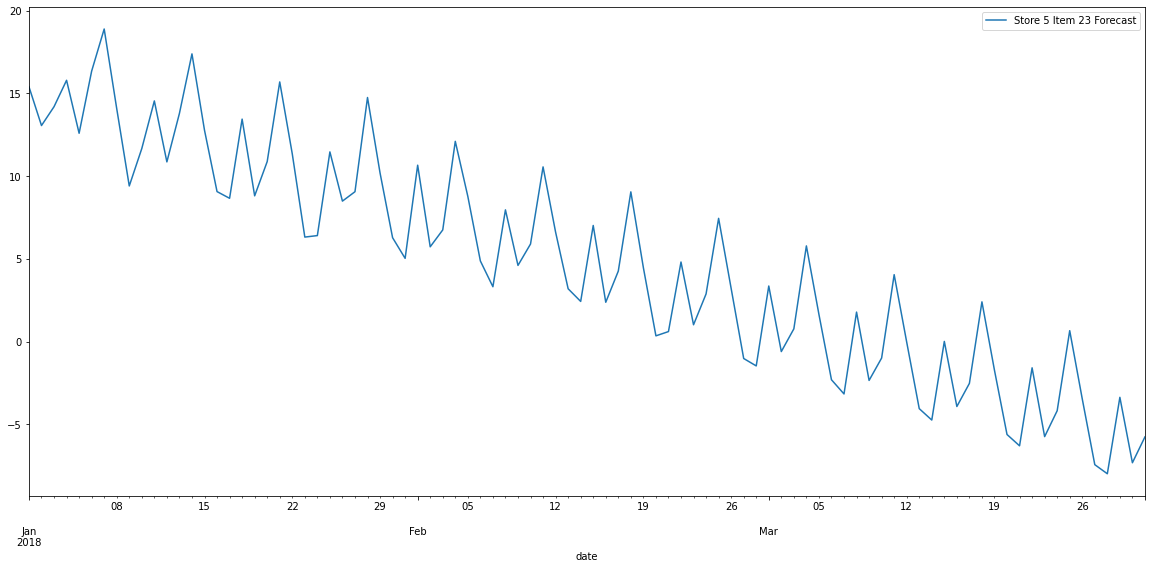

In [21]:
# Sale Forecast for Store 5 Item 23
sarima_results[(sarima_results.store == 5) & (sarima_results.item == 23)].sales.plot(figsize = (20,9),legend=True, label = "Store 5 Item 23 Forecast");

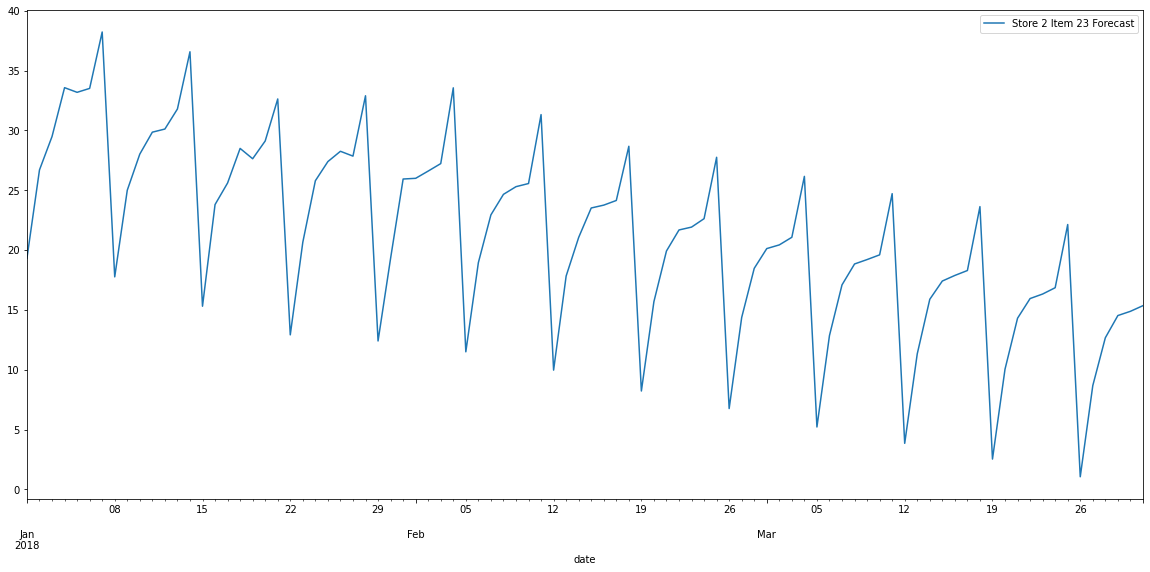

In [22]:
# Sale Forecast for Store 2 Item 23
sarima_results[(sarima_results.store == 2) & (sarima_results.item == 23)].sales.plot(figsize = (20,9),legend=True, label = "Store 2 Item 23 Forecast");

##### Comparing the SMAPE of diffrent models

In [24]:
score = pd.DataFrame({'Model' : ['LGBOOST', 'XGBOOST','ARIMA', 'SARIMA'],
                      'SMAPE' : [lgb_smape,xgb_smape,arima_smape,sarima_smape]})
score.style.hide_index()

- We can see that LGBoost model gave the better results and hence thus we choose LGBoost as our model for forecasting the demand of products at the retail outlet.

Thank You.